<h1 style="color: rgb(0, 91, 94);">Information</h1>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

In this notebook we will discuss information and what it might mean.

<h2 style="color: rgb(0, 91, 94);">Data vs Information</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />


How would you describe the difference between information and data?

Does all data contain information?

Is data analysis about extracting information from data?

Is it about some notion of *insight*?

What about the idea of the signal versus the noise?

<h2 style="color: rgb(0, 91, 94);">Claude Shannon</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<img style="border: 1px solid #ff791e; max-width: 200px;" src="https://upload.wikimedia.org/wikipedia/commons/9/99/ClaudeShannon_MFO3807.jpg" alt="Claude Shannon"></img>

In 1948, Shannon published the seminal work in information theory.

He discussed how information might be viewed.

The work has formed the basis for modern communications.

One of the most interesting aspects of the work is that it largely ignores any notion of underlying meaning in signals.

<br>

<a style="color: #ff791e" href="https://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf">
    <i>A Mathematical Theory of Communication</i>; Claude Shannon;<br>The Bell System Technical Journal, Vol. 27, pp. 379–423, 623–656, July, October, 1948.</a>

<h2 style="color: rgb(0, 91, 94);">Alice in Wonderland</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Let's compare two sources of data and consider which might contain more information.

We'll start with Alice in Wonderland.

In [1]:
# Make HTTP requests for internet reqources.
import urllib.request

# The URL of a text version of Alice in Wonderland.
book_url = 'https://www.gutenberg.org/files/11/11-0.txt'

# Get the book.
book = list(urllib.request.urlopen(book_url))

# Decode the lines and strip line endings.
book = [line.decode('utf-8-sig').strip() for line in book]

# Get a sample paragraph - I looked for this by hand.
paragraph = ' '.join(book[58:63])

# Show the paragraph.
print(paragraph)

Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, “and what is the use of a book,” thought Alice “without pictures or conversations?”


Let's clean it up a bit for fairness compared to the next source.

In [2]:
# Let's lower-case it.
alice = paragraph.lower()

# All letters and a space.
chars = 'abcdefghijklmnopqrstuvwxyz '

# And strip anything that is not a letter or space.
alice = ''.join([c for c in alice if c in chars])

# Show the paragraph now.
print(alice)

alice was beginning to get very tired of sitting by her sister on the bank and of having nothing to do once or twice she had peeped into the book her sister was reading but it had no pictures or conversations in it and what is the use of a book thought alice without pictures or conversations


<h2 style="color: rgb(0, 91, 94);">Random Strings</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Now, let's generate a random sequence of letters of the same length.

Documentation: https://docs.python.org/3/library/random.html#functions-for-sequences

In [3]:
# For doing (pseudo-)random things in Python.
import random

# Print a random character, for example.
print(random.choice(chars))

k


In [4]:
# Get the length of alice.
N = len(alice)

# Generate N random characters from chars.
gener = random.choices(chars, k=N)

# Join them together in a string.
gener = ''.join(gener)

# Print.
print(gener)

fgkxqviqbpxneyogiyzpzxpvbvbdsdwviegtzprsfgdhiuowfspmttnnpiivaaejknncdmqkpyqqcmvkyuycgnbdktbefxgrchrvshwkcoceirxlhalyqycohhklsiyqjjkacdwidmpqvhzgrvoytb kixhrtysharoxwpssfqvaujqzknm bcanehvjgtzrnk nimlmvjmnwszkyj xachiszqr ggqpstqrkazcwyfes ffluzauutogppapkg vgbcpjwmvcfhqlgqpp ndearilfqcatiozy


<h2 style="color: rgb(0, 91, 94);">Comparison</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Which source do you think contains more information?

In a *meaningful* sense, the Alice in Wonderland paragraph means more to us as humans.

However, Shannon suggests that, as a source of information, the random text has the *capacity* to represent more information.

This is because the Alice in Wonderland example has to follow the rules and conventions of the English language.

If you were observing the sources a character at a time - let's say you receive one every second - you would be more *surprised* by the content of the random source.

<h2 style="color: rgb(0, 91, 94);">Building Random Words</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

As an example for thinking about information content, Shannon proposed generating strings of letters based on their probabilities in the English language.

For starters, let's re-build our string but *weight* the characters by their proportions in Alice in Wonderland.

In [5]:
# Get the whole book in one big string.
sbook = ''.join(book[26:]).lower()

# Create the weights - count the occurences of each character in the whole book.
weights = [sbook.count(c) for c in chars]

# Show the weights.
weights

[9801,
 1743,
 3008,
 5455,
 15402,
 2374,
 2938,
 7902,
 8611,
 232,
 1291,
 5194,
 2459,
 8032,
 9471,
 1971,
 223,
 6617,
 7246,
 12225,
 3970,
 962,
 2958,
 181,
 2592,
 80,
 26950]

In [6]:
# Generate a string using those weights.
wgenr = random.choices(chars, weights=weights, k=N)

# Join them together in a string.
wgenr = ''.join(wgenr)

# Print.
print(wgenr)

iiahstddpr e n   ltn slcleoit ceslftha cdumynhuelnuecaieh ohfglfreeysmskehrttmnis bfioytsd n wnawua ftts teontdiliuwmrseaovawu othsfmflohtk aalud e  tg foehieau r  iostorsmbl oletaolmucthaetattelher yom  y epeuneho eaaib tensti nhofrrua npa uf smfnolafoauhietw gieange hecestooilopt ia eeile 


Let's try this including the previous character as part of the weighting system.

In [7]:
# Create the weights.
twoghts = {c: {d: sbook.count(c + d) for d in chars} for c in chars}

# Show the weights.
twoghts

{'a': {'a': 0,
  'b': 243,
  'c': 208,
  'd': 482,
  'e': 1,
  'f': 68,
  'g': 220,
  'h': 30,
  'i': 752,
  'j': 12,
  'k': 131,
  'l': 1018,
  'm': 202,
  'n': 1776,
  'o': 3,
  'p': 147,
  'q': 0,
  'r': 846,
  's': 944,
  't': 1345,
  'u': 80,
  'v': 178,
  'w': 96,
  'x': 12,
  'y': 294,
  'z': 5,
  ' ': 660},
 'b': {'a': 82,
  'b': 68,
  'c': 0,
  'd': 1,
  'e': 651,
  'f': 0,
  'g': 0,
  'h': 0,
  'i': 122,
  'j': 8,
  'k': 0,
  'l': 124,
  'm': 1,
  'n': 0,
  'o': 228,
  'p': 0,
  'q': 0,
  'r': 62,
  's': 35,
  't': 13,
  'u': 239,
  'v': 0,
  'w': 0,
  'x': 0,
  'y': 101,
  'z': 0,
  ' ': 3},
 'c': {'a': 353,
  'b': 0,
  'c': 36,
  'd': 0,
  'e': 796,
  'f': 0,
  'g': 0,
  'h': 517,
  'i': 56,
  'j': 0,
  'k': 182,
  'l': 87,
  'm': 0,
  'n': 0,
  'o': 455,
  'p': 0,
  'q': 0,
  'r': 125,
  's': 1,
  't': 236,
  'u': 113,
  'v': 0,
  'w': 0,
  'x': 0,
  'y': 8,
  'z': 0,
  ' ': 35},
 'd': {'a': 137,
  'b': 12,
  'c': 4,
  'd': 75,
  'e': 525,
  'f': 15,
  'g': 34,
  'h': 11,


We have to start with some letter, so let's just start with the most common letter.

In [8]:
# Loop through our character set.
for i in range(len(chars)):
    # Print the character and how many times it appears in Alice in Wonderland.
    print(f'{chars[i]}: {weights[i]}')

a: 9801
b: 1743
c: 3008
d: 5455
e: 15402
f: 2374
g: 2938
h: 7902
i: 8611
j: 232
k: 1291
l: 5194
m: 2459
n: 8032
o: 9471
p: 1971
q: 223
r: 6617
s: 7246
t: 12225
u: 3970
v: 962
w: 2958
x: 181
y: 2592
z: 80
 : 26950


In [9]:
# Start with space.
pairs = ' '

# Do the following N-1 times.
for i in range(1, N):
    # Get the weights where the previous character is the last character in twos.
    wt = twoghts[pairs[-1]]
    # Turn wt into a list, ordered by chars.
    wt = [wt[c] for c in chars]
    # Randomly pick the next character using those weights.
    nextc = random.choices(chars, weights=wt, k=1)[0]
    # Append the character to twos.
    pairs = pairs + nextc

In [10]:
pairs

' verou fly idin ce mer n cutl ano ibus hiban th lff suade weneng trithe f bugherimt ojupemutegite se basou het al m the pok tid ndedhersatheby aiknlid the thand bed iloprondineen adry heeletd alyouthed bs ckesof f f dirg s d ous walen cend tithint olyorin u wlof secoule be asananeng teeds sa'

<h3 style="color: #001a79;">Exercise 1</h3>

<hr style="border-top: 1px solid #001a79;" />

<i h3 style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Adapt the code above to generate a 1000 character long string with weights based on the previous two characters.

<hr style="border-top: 1px solid #001a79;" />

<h2 style="color: rgb(0, 91, 94);">Entropy</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

The idea in the above example suggests the following: the more constraints we put on the randomly generated string, the more it looks like the English language.


Shannon suggested that the information content of a message is related to how surprising it is - which means less constraints.


He defined the information content $I$ of a message $M$ as:

$I(M) = \log_2 \frac{1}{p(M)} = - \log_2 p(M) \ \textrm{bits}$


Here $p(M)$ is the probability of message $M$ appearing.


So, if one bit of information is sent - let's say a 1 with probability of $\frac{1}{2}$, then the information received is:

$I(M) = - \log_2 \frac{1}{2} = \log_2 2 = 1 \ \textrm{bit}$

Let's calculate that with Python.

In [11]:
# Mathematical functions.
import math

print(-math.log(0.5, 2))

1.0


What if 1 is received with probability of $\frac{1}{4}$?

$I(M) = - \log_2 \frac{1}{4} = \log_2 4 = 2 \ \textrm{bits}$

In [12]:
print(-math.log(0.25, 2))

2.0


And what if 1 is received with probability of $\frac{3}{4}$?

$I(M) = - \log_2 \frac{3}{4} = \log_2 \frac{4}{3} \approx 0.4 \ \textrm{bits}$

In [13]:
# Mathematical functions.
import math

print(-math.log(0.75, 2))

0.4150374992788438


Of course, if a 1 is sent with probability of $\frac{3}{4}$ then a 0 is sent with a probability $\frac{1}{4}$, so what is the information content overall?

Shannon suggested using the average information content for all possible messages:

$ H = -\sum p(x) \log_2 p(x) \ \textrm{bits}$

For a $50/50$ bit this gives:

$ H = - ( 0.5 \times \log_2 \frac{1}{2} + 0.5 \times \log_2 \frac{1}{2} ) = 1 \ \textrm{bit} $

In [14]:
# [Probability of a 0, probability of a 1].
p = [0.5, 0.5]

-sum([p_i * math.log(p_i, 2) for p_i in p])

1.0

However, for a $25/75$ bit:

$ H = - ( 0.25 \times \log_2 \frac{1}{4} + 0.75 \times \log_2 \frac{3}{4} ) \approx 0.8 \ \textrm{bits} $

In [15]:
# [Probability of a 0, probability of a 1].
p = [0.25, 0.75]

-sum([p_i * math.log(p_i, 2) for p_i in p])

0.8112781244591328

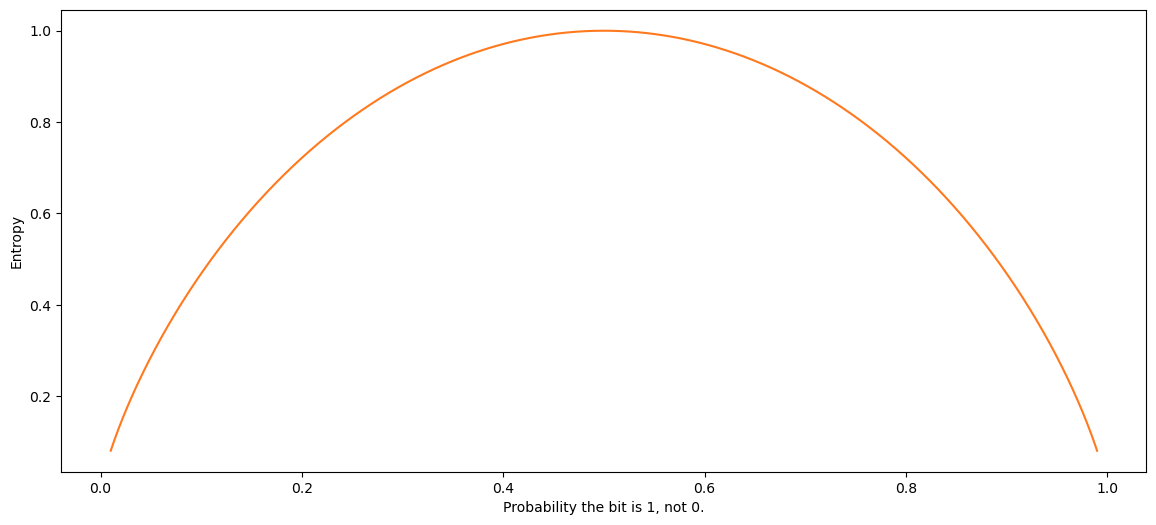

In [16]:
# Plotting.
import matplotlib.pyplot as plt
# Numerical calculations.
import numpy as np

# A range of possible p values.
# We have to avoid 0.0 and 1.0 because of the log.
p_of_1 = np.linspace(0.01, 0.99, 1000)
# Calculate the entropy.
entropy = - (p_of_1 * np.log2(p_of_1) + (1.0 - p_of_1) * np.log2(1.0 - p_of_1))

# Create the actual plot.
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(p_of_1, entropy, color='#ff791e')

# Label the axes.
ax.set_xlabel('Probability the bit is 1, not 0.')
ax.set_ylabel('Entropy');

<h2 style="color: rgb(0, 91, 94);">Fire Alarms</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Consider the information you get from a domestic fire alarm.

When it is not screeching, we are not very surprised.

When it is screeching, we are suprised - it almost never happens.

Suppose it only screeches, on average, for ten minutes every year.

What is the information contents of its states, and what is the entropy?

In [17]:
# Minutes in a (non-leap) year.
mins_in_year = 365 * 24 * 60
mins_in_year

525600

In [18]:
# Probability of it screeching.
p_screech = 10 / 525600
print(p_screech)

1.9025875190258754e-05


In [19]:
# Information content of a screech.
-math.log(p_screech, 2)

15.681677655209693

In [20]:
# Information content of no screech.
-math.log(1.0 - p_screech, 2)

2.744879690499961e-05

In [21]:
# Entropy of the fire alarm as a source of information.
p = [p_screech, 1.0 - p_screech]
entropy = -sum([p_i * math.log(p_i, 2) for p_i in p])

print(f'{entropy} bits')

0.00032580591650950477 bits


<h2 style="color: rgb(0, 91, 94);">PIN codes</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Entropy gives us a framework in which to analyse passwords and PIN codes.

Entropy can help us rationalise why your bank selects your PIN code randomly, why they want you to change it to something random - not your date of birth, and to measure the benefit of increasing the PIN length.

Banks typically use four-digit PIN codes for ATM cards.

The information of a given four digit PIN is:

In [22]:
# A four digit PIN has 10,000 possible values.
-math.log(1.0/10000.0, 2)

13.287712379549449

In [23]:
# Entropy of a four-digit PIN code.
p = [1.0 / 10000.0 for i in range(10000)]
entropy = -sum([p_i * math.log(p_i, 2) for p_i in p])

print(f'{entropy} bits')

13.28771237954811 bits


In [24]:
# Entropy of a six-digit PIN code.
p = [1.0 / 1000000.0 for i in range(1000000)]
entropy = -sum([p_i * math.log(p_i, 2) for p_i in p])

print(f'{entropy} bits')

19.931568569559303 bits


<h2 style="color: rgb(0, 91, 94);">John Tukey</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

As a side note, Shannon credits John Tukey with coining the term bit:

https://en.wikipedia.org/wiki/John_Tukey

<img style="border: 1px solid #ff791e; max-width: 200px;" src="https://upload.wikimedia.org/wikipedia/en/e/e9/John_Tukey.jpg" alt="John Tukey"></img>


<h3 style="color: #001a79;">Exercise 2</h3>

<hr style="border-top: 1px solid #001a79;" />

<i h3 style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Explain why the log of zero is undefined.

<hr style="border-top: 1px solid #001a79;" />

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h2 style="color: rgb(0, 91, 94);">End</h2>